In [95]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_val_score

from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, grid_search
from sklearn.model_selection import GridSearchCV

In [3]:
import pandas as pd
import numpy as np

In [6]:
#merge
d1 = pd.read_csv("audit_risk.csv")
d2 = pd.read_csv("trial.csv")
print("Data has been read")
df = pd.merge(d1,d2)
df.head()


Data has been read


,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Audit_Risk,Risk,SCORE_A,SCORE_B,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,1.7148,1,6,2,2,2,2,0,2,2
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.5108,0,2,2,2,2,2,0,2,2
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.3096,0,2,2,2,2,2,0,2,2
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,3.5060,1,2,6,6,6,2,0,2,2
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.2832,0,2,2,2,2,2,0,2,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 35 columns):
Sector_score      629 non-null float64
LOCATION_ID       629 non-null object
PARA_A            629 non-null float64
Score_A           629 non-null float64
Risk_A            629 non-null float64
PARA_B            629 non-null float64
Score_B           629 non-null float64
Risk_B            629 non-null float64
TOTAL             629 non-null float64
numbers           629 non-null float64
Score_B.1         629 non-null float64
Risk_C            629 non-null float64
Money_Value       628 non-null float64
Score_MV          629 non-null float64
Risk_D            629 non-null float64
District_Loss     629 non-null int64
PROB              629 non-null float64
RiSk_E            629 non-null float64
History           629 non-null int64
Prob              629 non-null float64
Risk_F            629 non-null float64
Score             629 non-null float64
Inherent_Risk     629 non-null float64
CON

In [10]:
df.isnull().any()

Sector_score      False
LOCATION_ID       False
PARA_A            False
Score_A           False
Risk_A            False
PARA_B            False
Score_B           False
Risk_B            False
TOTAL             False
numbers           False
Score_B.1         False
Risk_C            False
Money_Value        True
Score_MV          False
Risk_D            False
District_Loss     False
PROB              False
RiSk_E            False
History           False
Prob              False
Risk_F            False
Score             False
Inherent_Risk     False
CONTROL_RISK      False
Detection_Risk    False
Audit_Risk        False
Risk              False
SCORE_A           False
SCORE_B           False
Marks             False
MONEY_Marks       False
District          False
Loss              False
LOSS_SCORE        False
History_score     False
dtype: bool

In [11]:
df[df.isnull().values==True]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Audit_Risk,Risk,SCORE_A,SCORE_B,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
512,55.57,4,0.23,0.2,0.046,0.0,0.2,0.0,0.23,5.0,...,0.2892,0,2,2,2,2,2,0,2,2


In [13]:
df["Money_Value"].mean()

17.30128025477708

In [15]:
df['Money_Value']=df['Money_Value'].fillna(df["Money_Value"].mean())

In [17]:
df.isnull().any()

Sector_score      False
LOCATION_ID       False
PARA_A            False
Score_A           False
Risk_A            False
PARA_B            False
Score_B           False
Risk_B            False
TOTAL             False
numbers           False
Score_B.1         False
Risk_C            False
Money_Value       False
Score_MV          False
Risk_D            False
District_Loss     False
PROB              False
RiSk_E            False
History           False
Prob              False
Risk_F            False
Score             False
Inherent_Risk     False
CONTROL_RISK      False
Detection_Risk    False
Audit_Risk        False
Risk              False
SCORE_A           False
SCORE_B           False
Marks             False
MONEY_Marks       False
District          False
Loss              False
LOSS_SCORE        False
History_score     False
dtype: bool

In [20]:
df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Audit_Risk,Risk,SCORE_A,SCORE_B,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,1.7148,1,6,2,2,2,2,0,2,2
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.5108,0,2,2,2,2,2,0,2,2
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.3096,0,2,2,2,2,2,0,2,2
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,3.5060,1,2,6,6,6,2,0,2,2
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.2832,0,2,2,2,2,2,0,2,2


In [22]:
df.dtypes

Sector_score      float64
LOCATION_ID        object
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
SCORE_A             int64
SCORE_B             int64
Marks               int64
MONEY_Marks         int64
District            int64
Loss                int64
LOSS_SCORE          int64
History_score       int64
dtype: object

In [57]:
df.shape

(629, 35)

In [59]:
from scipy import stats
z=np.abs(stats.zscore(df.iloc[:,np.r_[0,2:35]]))
print(z) #Warning occurs because some of the columns have standard deviation 0

[[0.71376118 0.24802611 1.45000473 ... 0.16986378 0.17463618 0.27282252]
 [0.71376118 0.41828186 0.7664059  ... 0.16986378 0.17463618 0.27282252]
 [0.71376118 0.33698591 0.7664059  ... 0.16986378 0.17463618 0.27282252]
 ...
 [1.39045502 0.38002494 0.7664059  ... 0.16986378 0.17463618 0.27282252]
 [1.39045502 0.38640109 0.7664059  ... 0.16986378 0.17463618 0.27282252]
 [1.39045502 0.41828186 0.7664059  ... 0.16986378 0.17463618 0.27282252]]


C:\Users\Siddarth\Anaconda3\lib\site-packages\scipy\stats\stats.py:2253: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [60]:
outlier =list((np.where(z > 3.99)))

C:\Users\Siddarth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [61]:
rows=set(outlier[0])

In [63]:
delrows =list(rows)

In [65]:
dfout=df.drop(delrows)

In [68]:
#Removing 100% skewed data as they are totally useless and does not help in modeling
for i in range(0,len(dfout.columns)):
    print(dfout.columns.values[i],' is---->   {:,.2f}'.format(dfout.iloc[:,i].value_counts(normalize=True).values[0]*100), '% skewed ')

Sector_score  is---->   29.84 % skewed 
LOCATION_ID  is---->   8.73 % skewed 
PARA_A  is---->   27.75 % skewed 
Score_A  is---->   65.45 % skewed 
Risk_A  is---->   27.75 % skewed 
PARA_B  is---->   39.62 % skewed 
Score_B  is---->   71.03 % skewed 
Risk_B  is---->   39.62 % skewed 
TOTAL  is---->   19.90 % skewed 
numbers  is---->   93.54 % skewed 
Score_B.1  is---->   93.54 % skewed 
Risk_C  is---->   93.54 % skewed 
Money_Value  is---->   45.38 % skewed 
Score_MV  is---->   73.47 % skewed 
Risk_D  is---->   45.55 % skewed 
District_Loss  is---->   85.86 % skewed 
PROB  is---->   100.00 % skewed 
RiSk_E  is---->   85.86 % skewed 
History  is---->   94.94 % skewed 
Prob  is---->   94.94 % skewed 
Risk_F  is---->   94.94 % skewed 
Score  is---->   56.20 % skewed 
Inherent_Risk  is---->   14.31 % skewed 
CONTROL_RISK  is---->   81.50 % skewed 
Detection_Risk  is---->   100.00 % skewed 
Audit_Risk  is---->   14.31 % skewed 
Risk  is---->   56.20 % skewed 
SCORE_A  is---->   65.45 % skewe

In [ ]:
dfout.drop(['LOSS_SCORE'], axis=1, inplace = True)
dfout.drop(['Loss'], axis=1, inplace = True)
dfout.drop(['PROB'], axis=1, inplace = True)
dfout.drop(['Detection_Risk'], axis=1, inplace = True)


In [73]:
dfout.shape

(573, 31)

In [75]:
df_final = dfout

In [77]:
corr = df_final.corr()
corr.style.background_gradient(cmap='coolwarm')

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk,SCORE_A,SCORE_B,Marks,MONEY_Marks,District,History_score
Sector_score,1,-0.374692,-0.448362,-0.370757,-0.301254,-0.331948,-0.293796,-0.333249,-0.172064,-0.172064,-0.172064,-0.236041,-0.364042,-0.231407,-0.15117,-0.15117,-0.147324,-0.147324,-0.147324,-0.416291,-0.339149,-0.190719,-0.282836,-0.479626,-0.448362,-0.331948,-0.172064,-0.364042,-0.15117,-0.147324
PARA_A,-0.374692,1,0.765889,0.998087,0.466541,0.576675,0.462538,0.578909,0.223287,0.223287,0.223287,0.249345,0.433875,0.243914,0.0421771,0.0421771,0.263453,0.263453,0.263453,0.640783,0.487793,0.126538,0.437192,0.570414,0.765889,0.576675,0.223287,0.433875,0.0421771,0.263453
Score_A,-0.448362,0.765889,1,0.772252,0.547887,0.752476,0.540618,0.618646,0.30413,0.30413,0.30413,0.351425,0.573207,0.341279,0.123642,0.123642,0.312527,0.312527,0.312527,0.847789,0.574896,0.219317,0.525121,0.788656,1,0.752476,0.30413,0.573207,0.123642,0.312527
Risk_A,-0.370757,0.998087,0.772252,1,0.467879,0.576924,0.463823,0.579845,0.223122,0.223122,0.223122,0.251144,0.433067,0.245689,0.0383363,0.0383363,0.263716,0.263716,0.263716,0.641535,0.489747,0.123013,0.439883,0.567971,0.772252,0.576924,0.223122,0.433067,0.0383363,0.263716
PARA_B,-0.301254,0.466541,0.547887,0.467879,1,0.720229,0.999562,0.991268,0.361251,0.361251,0.361251,0.330152,0.577151,0.325228,-0.0365058,-0.0365058,0.305175,0.305175,0.305175,0.716112,0.774424,0.0663176,0.674653,0.477798,0.547887,0.720229,0.361251,0.577151,-0.0365058,0.305175
Score_B,-0.331948,0.576675,0.752476,0.576924,0.720229,1,0.719534,0.749935,0.34477,0.34477,0.34477,0.355724,0.600993,0.345093,-0.00519942,-0.00519942,0.340599,0.340599,0.340599,0.938138,0.652006,0.107435,0.557979,0.698251,0.752476,1,0.34477,0.600993,-0.00519942,0.340599
Risk_B,-0.293796,0.462538,0.540618,0.463823,0.999562,0.719534,1,0.990264,0.360813,0.360813,0.360813,0.326517,0.571102,0.321699,-0.0367417,-0.0367417,0.303469,0.303469,0.303469,0.712826,0.771968,0.0655336,0.672376,0.471138,0.540618,0.719534,0.360813,0.571102,-0.0367417,0.303469
TOTAL,-0.333249,0.578909,0.618646,0.579845,0.991268,0.749935,0.990264,1,0.365017,0.365017,0.365017,0.340521,0.595977,0.335172,-0.0282336,-0.0282336,0.319167,0.319167,0.319167,0.755059,0.785843,0.0787097,0.685238,0.525041,0.618646,0.749935,0.365017,0.595977,-0.0282336,0.319167
numbers,-0.172064,0.223287,0.30413,0.223122,0.361251,0.34477,0.360813,0.365017,1,1,1,0.329018,0.447301,0.328784,0.0790807,0.0790807,0.101311,0.101311,0.101311,0.494291,0.434069,0.107764,0.397181,0.297584,0.30413,0.34477,1,0.447301,0.0790807,0.101311
Score_B.1,-0.172064,0.223287,0.30413,0.223122,0.361251,0.34477,0.360813,0.365017,1,1,1,0.329018,0.447301,0.328784,0.0790807,0.0790807,0.101311,0.101311,0.101311,0.494291,0.434069,0.107764,0.397181,0.297584,0.30413,0.34477,1,0.447301,0.0790807,0.101311


In [79]:
corrmat= (df_final.corr().abs())
highcorr=np.where(corrmat==1)


In [ ]:
highcorr=set([(corrmat.columns[x],corrmat.columns[y]) for x,y in zip(*highcorr) if x!=y])
highcorr=list(highcorr)

In [83]:
for i in highcorr:
    print(i[0],'   ',i[1],'------>',data[i[0]].corr(data[i[1]]))

Marks     Score_B.1 ------> 1.0
numbers     Score_B.1 ------> 0.9062250041998531
District_Loss     District ------> 1.0
District     District_Loss ------> 1.0
Score_B.1     numbers ------> 0.9062250041998531
Marks     numbers ------> 0.9062250041998546
History     History_score ------> 0.8577117503720125
numbers     Marks ------> 0.9062250041998546
Score_B.1     Marks ------> 1.0
History_score     History ------> 0.8577117503720124


In [86]:
df_final1 = df_final.drop(['Score_B.1','District_Loss'],axis = 1)

In [88]:
df_final1.shape

(573, 29)

In [90]:
#Audit_Risk as target columns for regression tasks

#Risk as the target column for classification tasks.
y_regression = df_final1['Audit_Risk']
y_classification = df_final1['Risk']
X_regression = df_final1.drop(['Audit_Risk','LOCATION_ID'], axis = 1)
X_classification = df_final1.drop(['Risk','LOCATION_ID'], axis = 1)

In [92]:
#For regression minmax or stand?
from sklearn.preprocessing import MinMaxScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(X_regression,y_regression, random_state = 0)

In [94]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

# KNN Regressor

In [96]:
param_grid = {'n_neighbors': np.arange(1,10)}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, return_train_score=True)

X_train, X_test, y_train, y_test = train_test_split(X_regression, y_regression, random_state=0)

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}
Best parameters: {'n_neighbors': 3}
Best cross-validation score: 0.76


# Linear Regression

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print("Train scores: {}".format(lreg.score(X_train, y_train)))
print("Test scores: {}".format(lreg.score(X_test, y_test)))
scorestrain = cross_val_score(lreg, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(lreg, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

Train scores: 0.9224960671662472
Test scores: 0.8624688168567934
Cross-validation Train scores: 0.8927530849417457
Cross-validation Test scores: 0.6084568577620724


# RIDGE

In [98]:
from sklearn.linear_model import Ridge
x_range = [0.001,0.01,0.1,1,10,100]
train_score_list=[]
test_score_list=[]

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

In [99]:
print(train_score_list)
print(test_score_list)

[0.9224960667042742, 0.9224960211901874, 0.9224916808072632, 0.9222007467964655, 0.9171728265394293, 0.8896852458477648]
[0.8624677556401418, 0.8624582073251778, 0.8623630266773831, 0.8614628162634697, 0.856410233289365, 0.8360563234967027]


Text(0.5,0,'$\\alpha$')

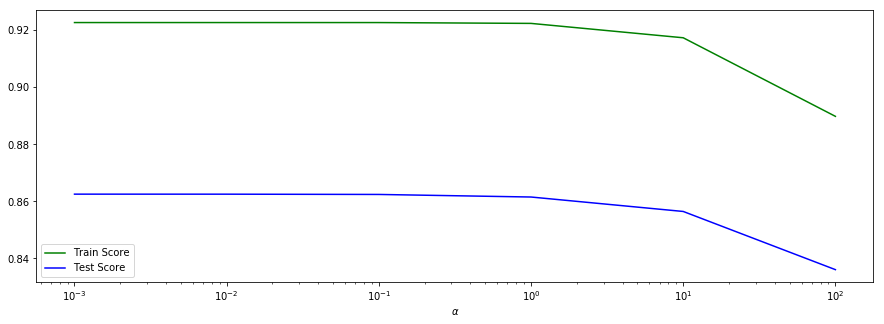

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [101]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))
scorestrain = cross_val_score(ridge, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(ridge, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

Train score: 0.9222
Test score: 0.8615
Cross-validation Train scores: 0.8930043729694818
Cross-validation Test scores: 0.6278866625448611


In [102]:
param_grid = {'alpha': [0.01, 0.1, 1, 10]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(Ridge(), param_grid, cv=5, return_train_score=True)


grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'alpha': [0.01, 0.1, 1, 10]}
Best parameters: {'alpha': 1}
Best cross-validation score: 0.89


In [103]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 0.1, 50).reshape(-1,1)
x_range2 = np.linspace(0.1, 10, 100).reshape(-1,1)

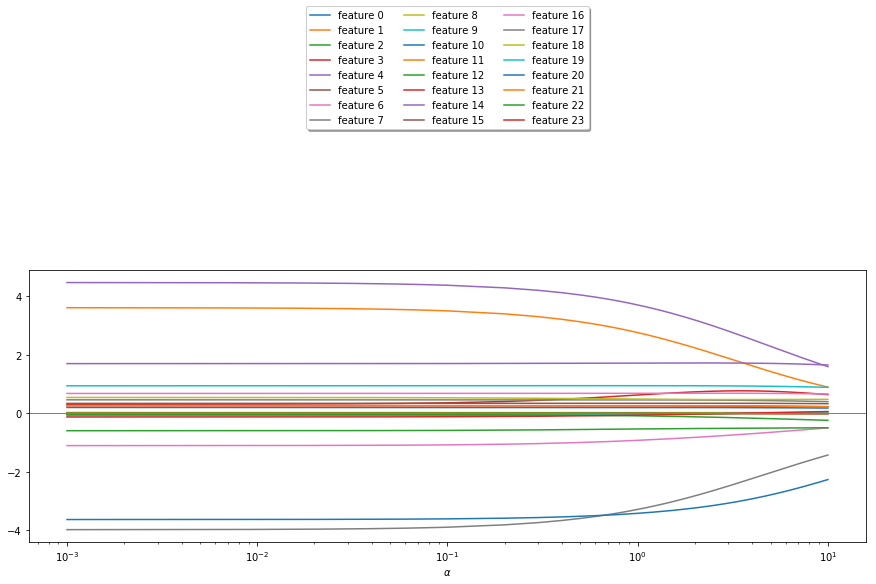

In [104]:
x_range = np.append(x_range1, x_range2)
coeff = []
fig ,ax= plt.subplots(figsize = (15,5))
for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,24):
    plt.plot(x_range, coeff[:,i],label = 'feature {:d}'.format(i))
    
plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

# LASSO Regression

In [105]:
from sklearn.linear_model import Lasso
x_range = [0.000001,0.00001,0.0001,0.001, 0.01, 0.1, 1]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

C:\Users\Siddarth\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [106]:

print(train_score_list)
print(test_score_list)


[0.9149122406416468, 0.9149160155601402, 0.9149562640414179, 0.915112252688994, 0.9148282769676258, 0.9069773405664728, 0.8252649564441662]
[0.8601622971516739, 0.8601560046328216, 0.8601013689857437, 0.8600024206138678, 0.8595864548871193, 0.8483178192055763, 0.7638986984664388]


Text(0.5,0,'$\\alpha$')

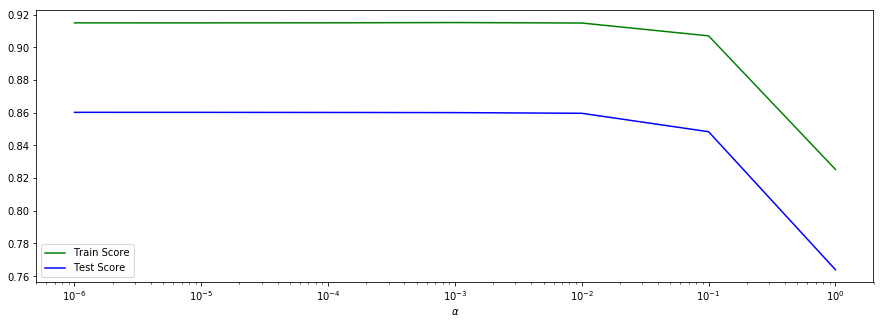

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [108]:
lasso = Lasso(0.01)
lasso.fit(X_train,y_train)
print('Train score: {:.4f}'.format(lasso.score(X_train,y_train)))
print('Test score: {:.4f}'.format(lasso.score(X_test, y_test)))
scorestrain = cross_val_score(lasso, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(lasso, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

Train score: 0.9148
Test score: 0.8596
Cross-validation Train scores: 0.8897272189586224
Cross-validation Test scores: 0.6299183304372913


C:\Users\Siddarth\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Siddarth\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Siddarth\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Siddarth\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might wa

In [109]:
param_grid = {'alpha': [0.01, 0.1, 1, 10]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(Lasso(), param_grid, cv=10, return_train_score=True)


grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'alpha': [0.01, 0.1, 1, 10]}


C:\Users\Siddarth\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Siddarth\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Siddarth\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Siddarth\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might wa

Best parameters: {'alpha': 0.1}
Best cross-validation score: 0.90


C:\Users\Siddarth\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# SGD Regressor

In [111]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(random_state=0, max_iter=10000, learning_rate='optimal', penalty='l2')
sgd_reg.fit(X_train, y_train)
print(sgd_reg.score(X_train, y_train))
print(sgd_reg.score(X_test, y_test))

-2.076958887251207e+24
-1.4690852751778197e+24


# SVM Simple Regression

In [112]:
from sklearn.svm import SVR
clf = SVR()
clf.fit(X_train,y_train)

print("Train scores: {}".format(clf.score(X_train, y_train)))
print("Test scores: {}".format(clf.score(X_test, y_test)))
scorestrain = cross_val_score(clf, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(clf, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))

Train scores: 0.2968316922044165
Test scores: 0.2744300702471131
Cross-validation Train scores: 0.20003516369963306
Cross-validation Test scores: 0.14367866070078006


# SVM Kernelized Regression - RBF

In [113]:
c_range = [1,10,100,200,300]
g_range = [0.01,0.1,1,5]

train_score_list = []
test_score_list = []
index = []

for x in c_range:
    for g in g_range:
        index.append((x,g))
        svr_rbf = SVR(kernel='rbf', C=x, gamma=g, epsilon=.1)
        svr_rbf.fit(X_train,y_train)
        train_score_list.append(svr_rbf.score(X_train,y_train))
        test_score_list.append(svr_rbf.score(X_test, y_test))

In [114]:
print(train_score_list)
print(test_score_list)

[0.40444310093880653, 0.22843770999188362, 0.12829601300393434, 0.07485984107833332, 0.8085111846338804, 0.7441634080947714, 0.6994192988671957, 0.6723472507915407, 0.9998997050818184, 0.9998869601937548, 0.999868131080933, 0.9998547765053332, 0.9998997050818184, 0.9998869601937548, 0.999868131080933, 0.9998547765053332, 0.9998997050818184, 0.9998869601937548, 0.999868131080933, 0.9998547765053332]
[0.4001542224745653, 0.20033767938723301, 0.09146421913073843, 0.033362207230095864, 0.6067036820975926, 0.3936404113786729, 0.26535278464448164, 0.21100239397364373, 0.6519735060758203, 0.4320661081808064, 0.2865261787386111, 0.23852961139042816, 0.6519735060758203, 0.4320661081808064, 0.2865261787386111, 0.23852961139042816, 0.6519735060758203, 0.4320661081808064, 0.2865261787386111, 0.23852961139042816]


Text(0.5,0,'C and Gamma')

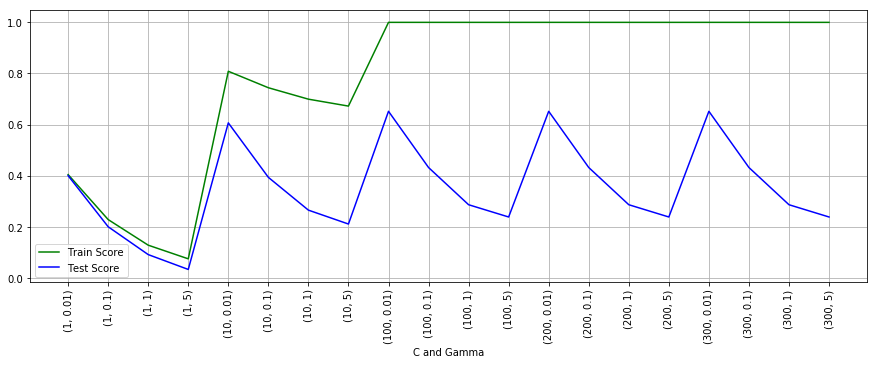

In [115]:

%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (15,5))
plt.plot(range(len(index)), train_score_list, c = 'g', label = 'Train Score')
plt.plot(range(len(index)), test_score_list, c = 'b', label = 'Test Score')
plt.legend(loc = 3)
plt.grid(True)
plt.xticks(range(len(index)), index, rotation=90)
plt.xlabel(r'C and Gamma')

In [120]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.01, epsilon=.1)
svr_rbf.fit(X_train,y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [121]:
print("Train scores: {}".format(svr_rbf.score(X_train, y_train)))
print("Test scores: {}".format(svr_rbf.score(X_test, y_test)))
scorestrain = cross_val_score(svr_rbf, X_train, y_train,cv=3)
print("Cross-validation Train scores: {}".format(scorestrain.mean()))
scorestest = cross_val_score(svr_rbf, X_test, y_test,cv=3)
print("Cross-validation Test scores: {}".format(scorestest.mean()))


Train scores: 0.9998997050818184
Test scores: 0.6519735060758203
Cross-validation Train scores: 0.5697281555086416
Cross-validation Test scores: 0.5402553733301341


In [122]:
svr_rbf = SVR(kernel='rbf', C=300, gamma=0.1, epsilon=.1)
svr_rbf.fit(X_train,y_train)
pred = svr_rbf.predict(X_test)

print("Min of Pred: {}".format(min(pred)))
print("Max of Pred: {}".format(max(pred)))
print("Min of Y test: {}".format(min(y_test)))
print("Max of Y test: {}".format(max(y_test)))

Min of Pred: 0.21235719117132845
Max of Pred: 10.105997199050218
Min of Y test: 0.28
Max of Y test: 44.8336


# SVM Kernelized Regression - Linear

In [ ]:
c_range = [1,10,100,200,300]

train_score_list = []
test_score_list = []

for x in c_range:
    svr_lin = SVR(kernel='linear', C=x)
    svr_lin.fit(X_train,y_train)
    train_score_list.append(svr_lin.score(X_train,y_train))
    test_score_list.append(svr_lin.score(X_test, y_test))